In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-risk-assessment-dataset/heart_attack_data.csv


# 🏥 Heart Attack Risk Assessment Analysis

📊 **Dataset Source:** [Kaggle - Heart Attack Risk Assessment Dataset](https://www.kaggle.com/datasets/shriyashjagtap/heart-attack-risk-assessment-dataset)  
📌 **Author's Profiles:**  
- 🐍 **Kaggle:** [My Kaggle Profile](https://www.kaggle.com/crissyro)  
- 💻 **GitHub:** [My GitHub Profile](https://github.com/crissyro)  

---


## 📌 Dataset Overview

This dataset contains key health indicators related to heart attack risk. The goal of this analysis is to explore the data, handle class imbalance, and build insightful features for better risk assessment.

### 📋 Features:

| Feature | Description |
|---------|------------|
| **age** | Patient's age (years) |
| **sex** | Biological sex (0 = Female, 1 = Male) |
| **total_cholesterol** | Total cholesterol level (mg/dL) |
| **ldl** | Low-Density Lipoprotein (LDL) cholesterol (mg/dL) |
| **hdl** | High-Density Lipoprotein (HDL) cholesterol (mg/dL) |
| **systolic_bp** | Systolic blood pressure (mmHg) |
| **diastolic_bp** | Diastolic blood pressure (mmHg) |
| **smoking** | Smoking status (0 = Non-Smoker, 1 = Smoker) |
| **diabetes** | Diabetes status (0 = No, 1 = Yes) |
| **heart_attack** | History of heart attack (0 = No, 1 = Yes) |

---


## 📊 Data Issues and Feature Engineering

🔸 **Class Imbalance:**  
The dataset had a class imbalance in the `heart_attack` column, which was addressed using **SMOTE (Synthetic Minority Over-sampling Technique)**.

🔹 **Feature Correlation:**  
There was a high correlation between `ldl` & `hdl`, as well as `systolic_bp` & `diastolic_bp`. To improve feature quality, we created two new features:

```python
df["total_cholesterol_ratio"] = df["ldl"] / df["hdl"]  
df["pulse_pressure"] = df["systolic_bp"] - df["diastolic_bp"]
```

🔸 **Handling Class Imbalance with SMOTE:**  
To balance the dataset, we applied SMOTE:

```python
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["heart_attack", "ldl", "systolic_bp"])
y = df["heart_attack"]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
```

---

## 🔍 Analysis Plan

1. **Exploratory Data Analysis (EDA) 📊**  
   - Visualizing distributions of key features  
   - Checking for missing values and outliers  
   - Correlation heatmap of features  

2. **Feature Engineering 🛠️**  
   - Creating new informative features  
   - Handling multicollinearity issues  

3. **Data Preprocessing 🏗️**  
   - Scaling numerical features  
   - Encoding categorical features if necessary  
   - Balancing the dataset using SMOTE  

4. **Model Training & Evaluation 🤖**  
   - Training classification models (Logistic Regression, Decision Trees, Random Forest, etc.)  
   - Evaluating performance with accuracy, precision, recall, and F1-score  
   - Hyperparameter tuning for optimal results  

5. **Insights & Conclusion 📌**  
   - Key takeaways from the analysis  
   - Recommendations for further improvement  

---

📌 **Stay tuned for the full analysis! 🚀**  

## 0. **Make import the necessary libraries 📚 and also make some settings for visualization 📊 and ignoring errors 🚫**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import init_notebook_mode
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_theme(style='whitegrid')

### **Read data from .csv file and check shape**

In [92]:
df = pd.read_csv('/kaggle/input/heart-attack-risk-assessment-dataset/heart_attack_data.csv')

print(df.shape)
df.head()

(1000, 10)


,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,1


## 1. **Exploratory Data Analysis (EDA) 📊**

### General information about dataset 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.2 KB


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,49.886000,14.209466,18.000000,40.000000,49.000000,59.000000,94.000000
sex,1000.0,0.527000,0.499520,0.000000,0.000000,1.000000,1.000000,1.000000
total_cholesterol,1000.0,201.087486,40.042655,84.165932,174.707208,201.191547,226.251708,354.660015
ldl,1000.0,130.047807,30.041659,36.259745,111.963197,130.678540,149.732446,231.376631
hdl,1000.0,49.811244,10.247178,20.600644,42.622102,49.682809,56.703598,82.319810
systolic_bp,1000.0,120.312687,15.507493,74.433950,110.062952,120.042175,130.911804,164.080967
diastolic_bp,1000.0,80.231248,10.235917,49.296305,73.277119,79.912592,87.084443,113.848127
smoking,1000.0,0.202000,0.401693,0.000000,0.000000,0.000000,0.000000,1.000000
diabetes,1000.0,0.090000,0.286325,0.000000,0.000000,0.000000,0.000000,1.000000
heart_attack,1000.0,0.182000,0.386038,0.000000,0.000000,0.000000,0.000000,1.000000


### Check null values 0️⃣

In [95]:
df.isnull().sum()

age                  0
sex                  0
total_cholesterol    0
ldl                  0
hdl                  0
systolic_bp          0
diastolic_bp         0
smoking              0
diabetes             0
heart_attack         0
dtype: int64

###  **Imbalance in the heart_attack column**

In [96]:
df['heart_attack'].value_counts()

heart_attack
0    818
1    182
Name: count, dtype: int64

### Also so little count of diabetes

In [97]:
df['diabetes'].value_counts()

diabetes
0    910
1     90
Name: count, dtype: int64

### Also so little count of smoking

In [98]:
df['smoking'].value_counts()

smoking
0    798
1    202
Name: count, dtype: int64

### Let's get rid of outliers using one and a half interquartile range

In [99]:
def remove_emissions(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    
    clear_df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    
    return clear_df

for column in list(['total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']):
    df = remove_emissions(df, column)

In [100]:
df['heart_attack'].value_counts()

heart_attack
0    792
1    171
Name: count, dtype: int64

### General visualization with ```seaborn.pairplot()``` 🖼️

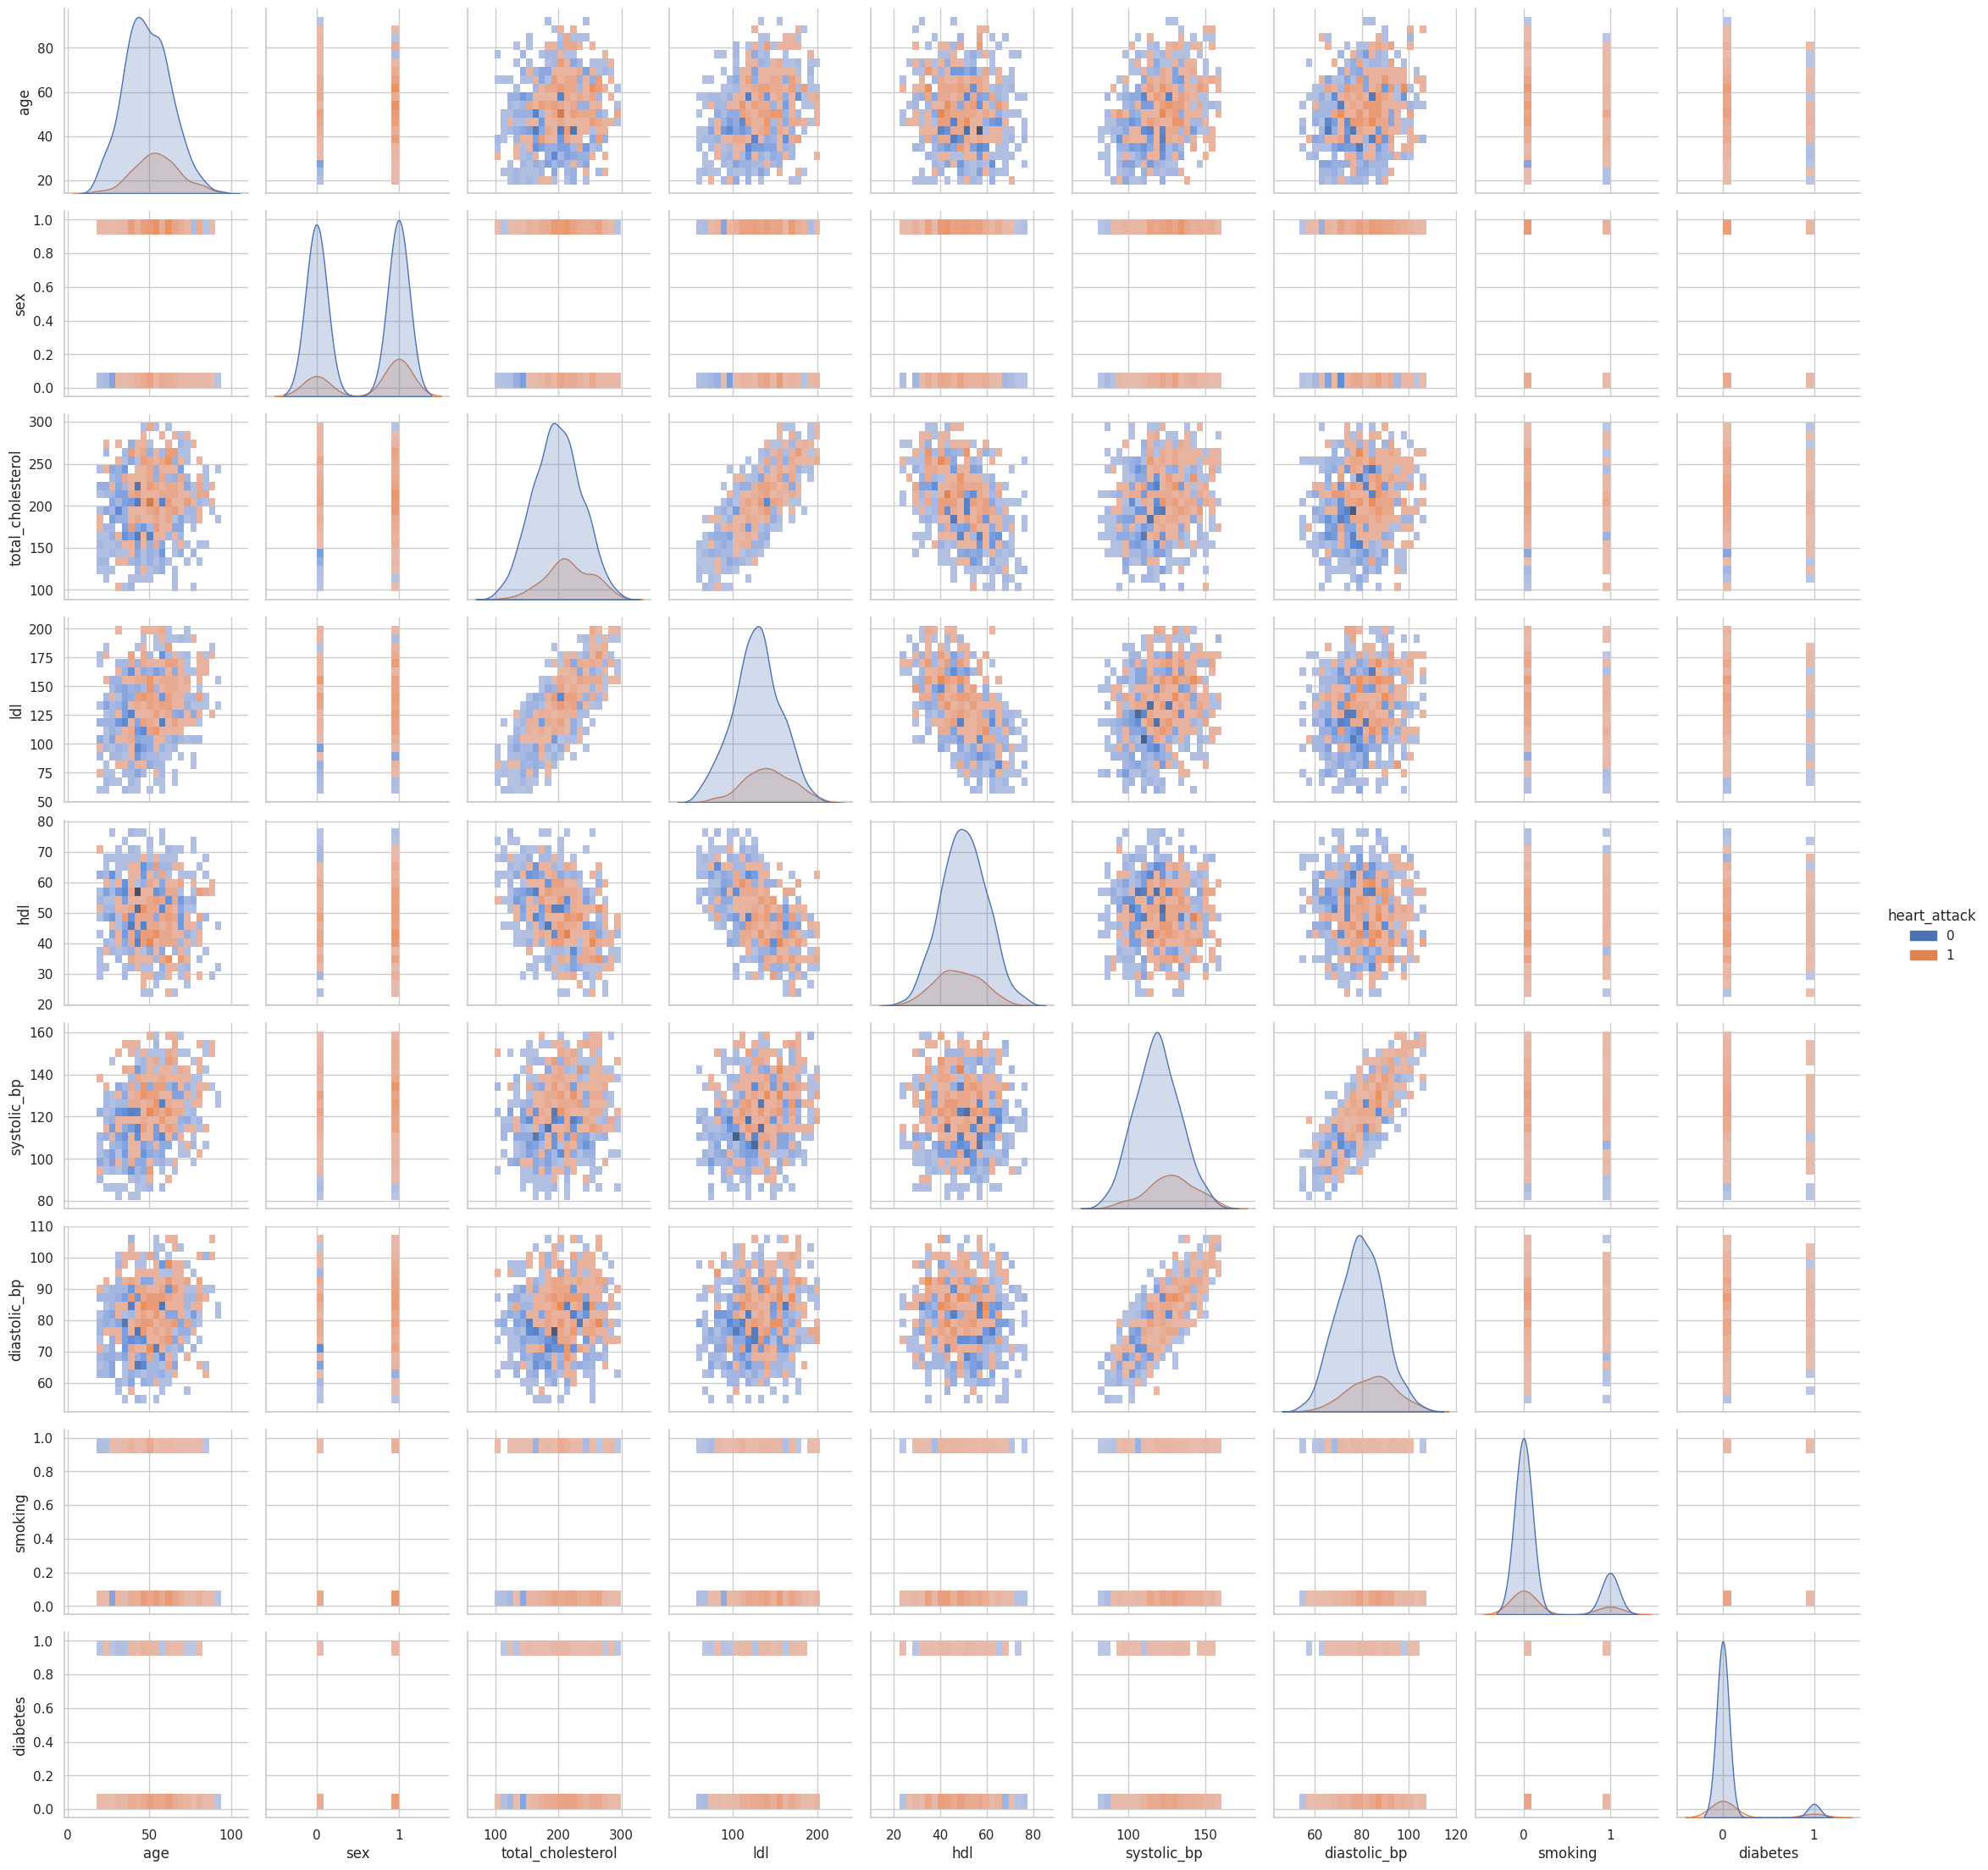

In [101]:
sns.pairplot(data=df, kind='hist', diag_kind='kde', hue='heart_attack');

### Check values histograms 📈

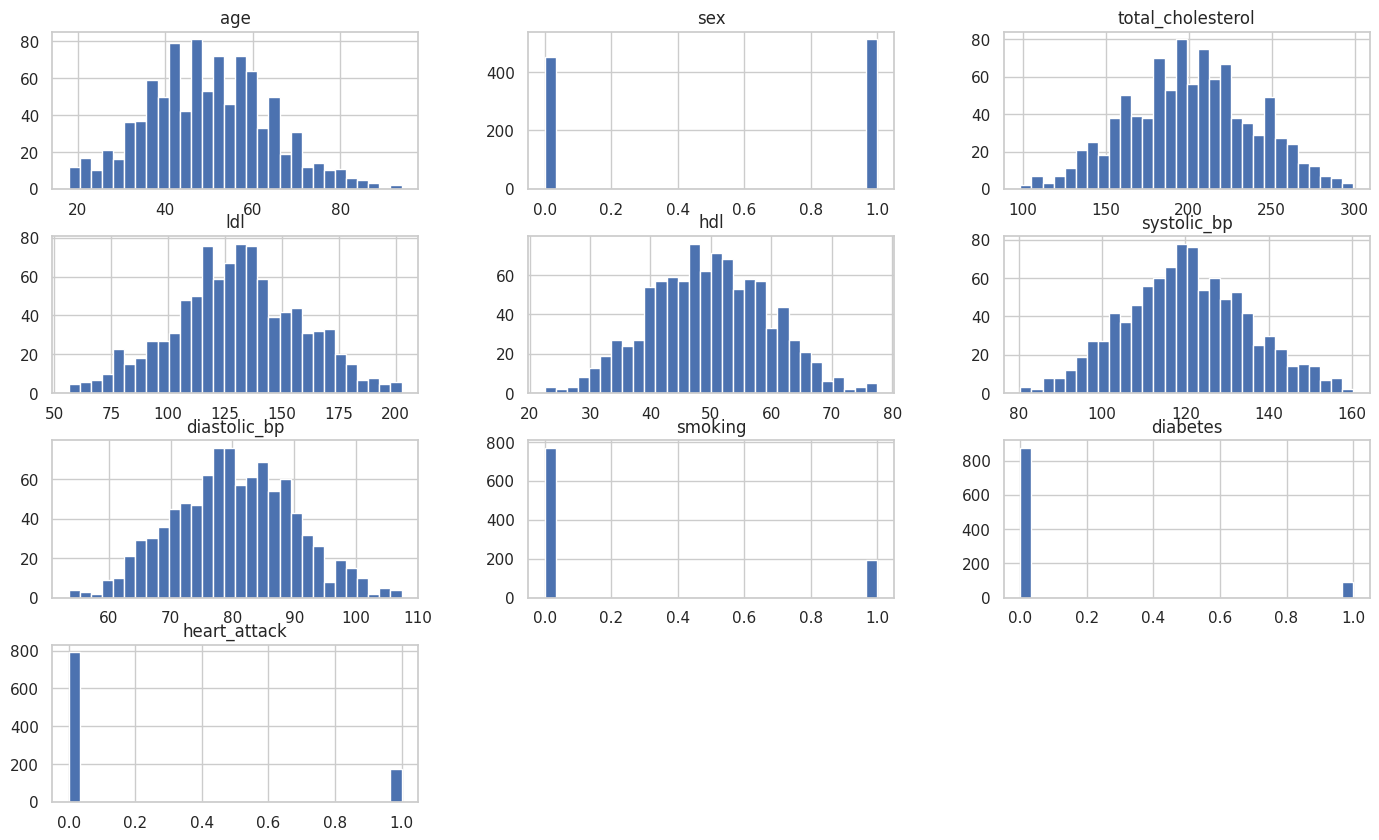

In [102]:
df.hist(bins=30, figsize=(17, 10));

In [103]:
fig = px.histogram(df, x='age', color='sex', animation_frame='heart_attack', title='Age distribution, color="sex", animation heart attack')
fig.show(renderer='iframe_connected')

### Let's look at the overall picture of various signs using a box plot, estimate the number of outliers 📊

In [104]:
fig = px.box(df, x='age', y='total_cholesterol', color='sex', animation_frame='heart_attack', template='ggplot2', title='Dependence of age on total_cholesterol')
fig.update_layout(width=1300, height=800)
fig.show(renderer='iframe_connected')

In [105]:
fig = px.box(df, x='age', y='ldl', color='sex', animation_frame='heart_attack', template='ggplot2', title='Dependence of age on ldl')
fig.update_layout(width=1300, height=800)
fig.show(renderer='iframe_connected')

In [106]:
fig = px.box(df, x='age', y='hdl', color='sex', animation_frame='heart_attack', template='ggplot2', title='Dependence of age on hdl')
fig.update_layout(width=1300, height=800)
fig.show(renderer='iframe_connected')

In [107]:
fig = px.box(df, x='age', y='systolic_bp', color='sex', animation_frame='heart_attack', template='ggplot2', title='Dependence of age on systolic_bp')
fig.update_layout(width=1300, height=800)
fig.show(renderer='iframe_connected')

In [108]:
fig = px.box(df, x='age', y='diastolic_bp', color='sex', animation_frame='heart_attack', template='ggplot2', title='Dependence of age on diastolic_bp')
fig.update_layout(width=1300, height=800)
fig.show(renderer='iframe_connected')

In [109]:
fig = px.box(df, x='heart_attack', y='age', color='smoking', animation_frame='sex', template='ggplot2')
fig.update_layout(width=1100, height=600)
fig.show(renderer='iframe_connected')

In [110]:
fig = px.box(df, x='heart_attack', y='age', color='diabetes', animation_frame='sex', template='ggplot2')
fig.update_layout(width=1100, height=600)
fig.show(renderer='iframe_connected')

In [111]:
fig = px.density_heatmap(
    df,
    x='total_cholesterol',
    y='diastolic_bp',
    facet_row='sex',
    facet_col='heart_attack',
    
    width=1200,  
    height=800, 
    
    facet_row_spacing=0.1, 
    facet_col_spacing=0.1, 
    
    text_auto=True,    
)

fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),  
    autosize=False, 
    font_size=12 
)

fig.show(renderer='iframe_connected')

In [112]:
gr = df.groupby(['smoking', 'diabetes', 'heart_attack'])['heart_attack'].size().reset_index(name='cnt')
gr

,smoking,diabetes,heart_attack,cnt
0,0,0,0,599
1,0,0,1,108
2,0,1,0,42
3,0,1,1,21
4,1,0,0,136
5,1,0,1,32
6,1,1,0,15
7,1,1,1,10


In [113]:
fig = px.bar(gr, x='heart_attack', y='cnt', color='smoking', animation_frame='diabetes', template='ggplot2', title='Count of different group of people')
fig.show(renderer='iframe_connected')

In [114]:
fig = px.pie(gr, values='cnt', names='smoking', title='Count smoking in dataset')
fig.show(renderer='iframe_connected')

In [115]:
fig = px.pie(gr, values='cnt', names='diabetes', title='Count diabetes in dataset')
fig.show(renderer='iframe_connected')

In [116]:
fig = px.scatter_3d(df, x='total_cholesterol', y='diastolic_bp', z='age', 
                    color='sex', animation_frame='heart_attack', template='ggplot2',
                   title='General scatter visualization of numeric features')
fig.show(renderer='iframe_connected')

### Correlation matrix

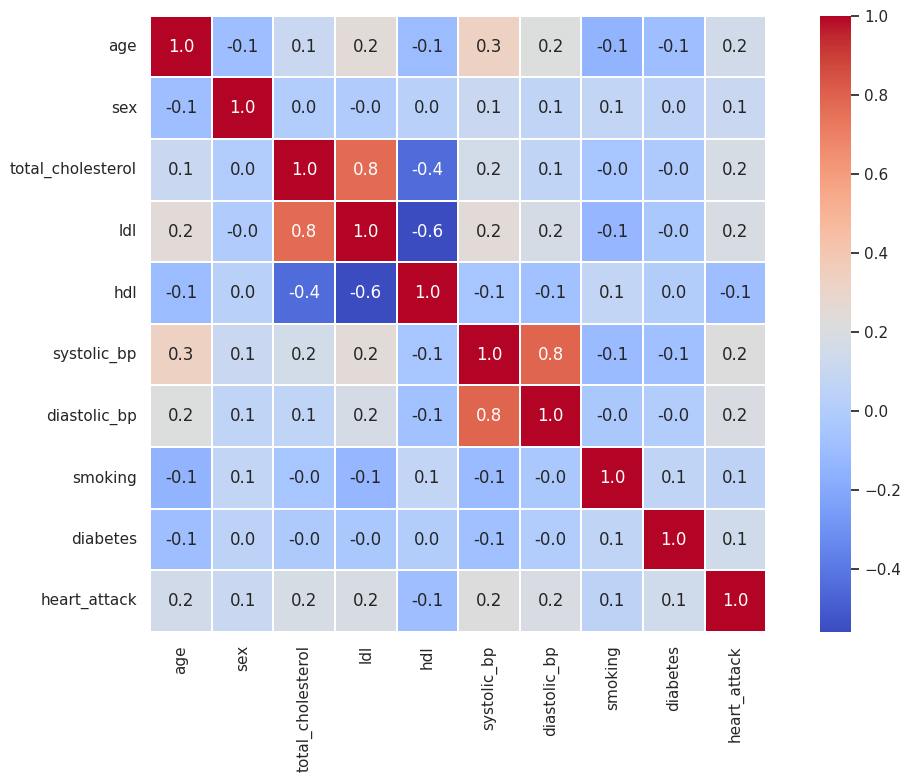

In [117]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

## 2. Feature Engineering 🛠️

In [118]:
df["total_cholesterol_ratio"] = df["ldl"] / df["hdl"]  
df["pulse_pressure"] = df["systolic_bp"] - df["diastolic_bp"]

In [119]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["heart_attack", "ldl", "systolic_bp"])
y = df["heart_attack"]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

## 🤖 Machine Learning Models & Results

After preprocessing the data and handling class imbalance, we trained several machine learning models to predict heart attack risk. The models evaluated include:

- **Decision Tree** 🌳 
- **Random Forest** 🌲🌲 
- **XGBoost** ⚡ 
- **CatBoost** 🔹 


In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
        classification_report, 
        accuracy_score, 
        recall_score, 
        precision_score, 
        f1_score, 
        roc_auc_score, 
        confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## 3. Data Preprocessing 🏗️

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [122]:
numeric_features = list(X_train.columns)
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

models_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 12, 15, 20],
            'classifier__min_samples_split': [2, 3, 4, 5, 7]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 75, 100, 125],
            'classifier__max_depth': [None, 10, 12, 15, 17, 20],
            'classifier__min_samples_split': [2, 3, 4, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [25, 50, 75, 100, 125, 150],
            'classifier__max_depth': [3, 4, 5, 6, 7],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'classifier__iterations': [25, 50, 75, 100, 125, 150],
            'classifier__depth': [3, 4, 5, 6, 7]
        }
    }
}

## 4. Model Training & Evaluation 🤖

Best parameters for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       159
           1       0.71      0.75      0.73       158

    accuracy                           0.72       317
   macro avg       0.72      0.72      0.72       317
weighted avg       0.72      0.72      0.72       317



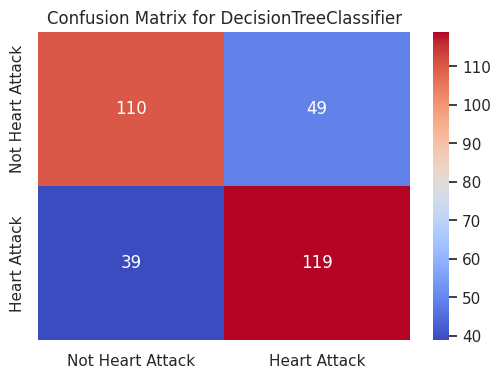

Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 125}
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       159
           1       0.83      0.85      0.84       158

    accuracy                           0.84       317
   macro avg       0.84      0.84      0.84       317
weighted avg       0.84      0.84      0.84       317



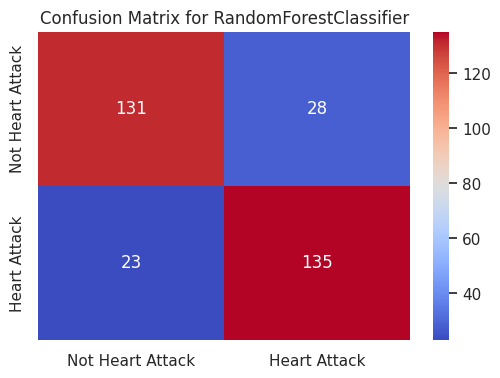

Best parameters for XGBoost: {'classifier__learning_rate': 0.5, 'classifier__max_depth': 7, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       159
           1       0.82      0.84      0.83       158

    accuracy                           0.83       317
   macro avg       0.83      0.83      0.83       317
weighted avg       0.83      0.83      0.83       317



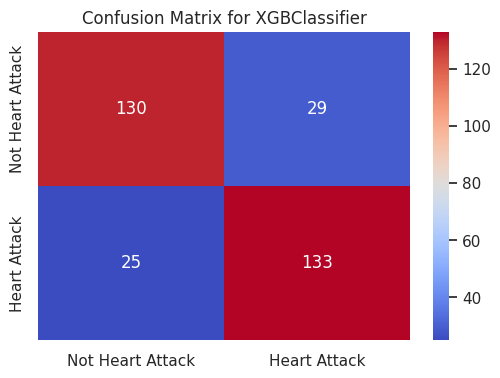

Best parameters for CatBoost: {'classifier__depth': 7, 'classifier__iterations': 125}
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       159
           1       0.78      0.79      0.78       158

    accuracy                           0.78       317
   macro avg       0.78      0.78      0.78       317
weighted avg       0.78      0.78      0.78       317



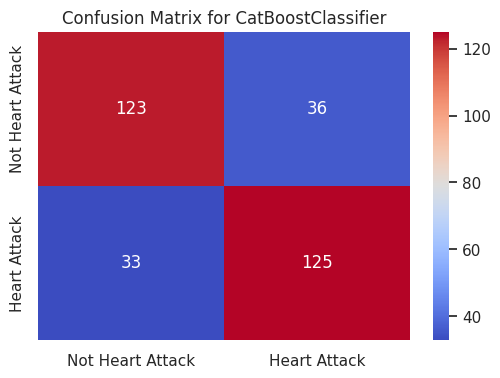

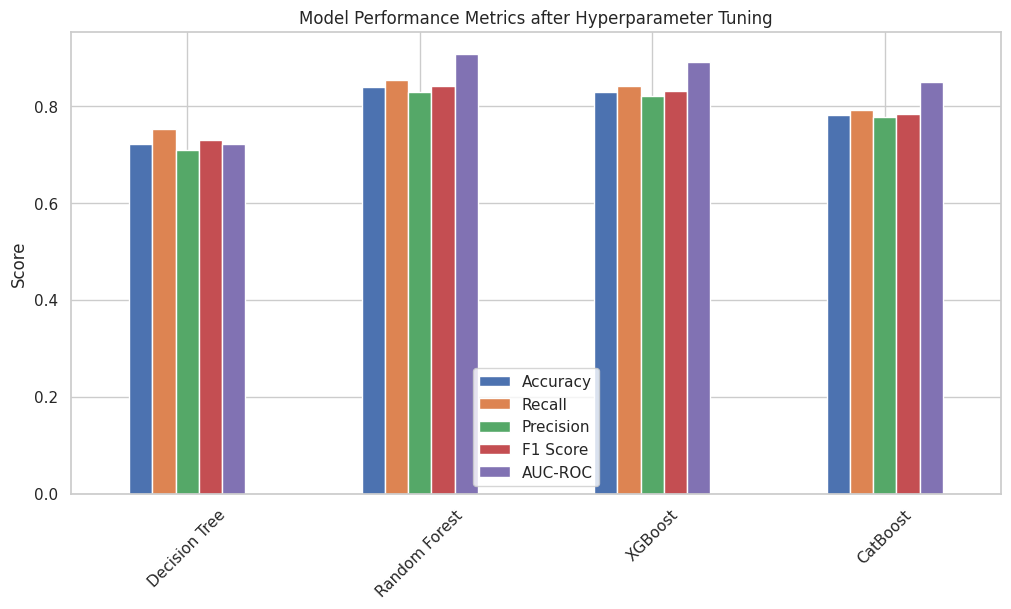

               Accuracy    Recall  Precision  F1 Score   AUC-ROC
Decision Tree  0.722397  0.753165   0.708333  0.730061  0.722494
Random Forest  0.839117  0.854430   0.828221  0.841121  0.907909
XGBoost        0.829653  0.841772   0.820988  0.831250  0.891251
CatBoost       0.782334  0.791139   0.776398  0.783699  0.850211


In [123]:
def evaluate_model(model_pipeline):
    model_pipeline.fit(X_train, y_train)
    
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:,1]
    
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm',
                xticklabels=['Not Heart Attack', 'Heart Attack'],
                yticklabels=['Not Heart Attack', 'Heart Attack'])
    plt.title(f'Confusion Matrix for {model_pipeline.named_steps["classifier"].__class__.__name__}')
    plt.show()
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }
    
    return metrics

results = {}
for name, model_info in models_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model_info['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='f1')
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    metrics = evaluate_model(grid_search.best_estimator_)
    results[name] = metrics

results_df = pd.DataFrame(results).T

results_df.plot(kind='bar', figsize=(12,6))
plt.title('Model Performance Metrics after Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.show()

print(results_df)

### 📊 Model Performance

The models were evaluated based on key metrics:

| Model | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|---------------|------------|------------|--------|-----------|------|
| CatBoost      | 78% | 79% | 78% | 78% | 85% |
| Decision Tree | 72% | 70% | 75% | 73% | 72% |
| Random Forest | **84%** | **85%** | **82%** | **84%** | **90%** |
| XGBoost       | 83% | 84% | 82% | 83% | 89% |

Random Forest performed the best, achieving **85% accuracy** with a good balance of precision and recall. However XGBoost has not bad results too   

---

## 5. Insights & Conclusion 📌

### 🙌 Acknowledgment

This project successfully explored the **Heart Attack Risk Assessment Dataset**, handling data imbalances, engineering new features, and applying machine learning models for prediction.  

🔹 **Key Takeaways:**  
- Feature engineering improved model performance 📊  
- SMOTE effectively handled class imbalance ⚖️  
- Random Forest delivered the best accuracy 🚀  

📢 **Thank you for your time and attention!** If you have any suggestions or improvements, feel free to reach out! Your feedback is highly appreciated. 🎯  

💬 **Comments & Discussions are welcome!** Let's improve this analysis together. 🚀  
